# Costa Rican Household Poverty Level Prediction 
Primary objective: Predicting group of income level for households in Costa Rica using individual-level and household-level hh_data. The following are the target variable values:
1 = extreme poverty
2 = moderate poverty
3 = vulnerable households
4 = non vulnerable households

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import OrderedDict
from textwrap import TextWrapper
%matplotlib inline

C:\Users\jayar\AppData\Local\Temp\ipykernel_18012\3966492441.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Loading the dataset
data = pd.read_csv("train.csv")
data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


## Data Exploration

### Summary Statistics

In [3]:
data[['age','v2a1','rooms','bedrooms','overcrowding','r4h1','r4h2','r4h3','r4m1','r4m2','r4m3','r4t1','r4t2','r4t3','v18q','tamhog','tamviv','escolari','rez_esc','hhsize','hogar_nin','hogar_adul',
     'hogar_mayor','hogar_total','dependency','edjefe','edjefa','meaneduc','qmobilephone']].describe().rename(columns={
         'overcrowding':'# persons per room',
    'v2a1': 'Monthly rent payment rooms','rooms': 'number of all rooms in the house',
    'v18q1': 'number of tablets household owns', 'r4h1': 'Males younger than 12 years of age',
    'r4h2': 'Males 12 years of age and older', 'r4h3': 'Total males in the household',
    'r4m1': 'Females younger than 12 years of age',
    'r4m2': 'Females 12 years of age and older',
    'r4m3': 'Total females in the household',
    'r4t1': 'persons younger than 12 years of age',
    'r4t2': 'persons 12 years of age and older',
    'r4t3': 'Total persons in the household',
    'tamhog': 'size of the household',
    'tamviv': 'number of persons living in the household',
    'escolari': 'years of schooling',
    'rez_esc': 'Years behind in school',
    'hhsize': 'household size',
    'hogar_nin': 'Number of children 0 to 19 in household',
    'hogar_adul': 'Number of adults in household',
    'hogar_mayor': '# of individuals 65+ in the household',
    'hogar_total': '# of total individuals in the household',
    'dependency': 'Dependency rate',
    'edjefe': 'years of education of male head of household',
    'edjefa': 'years of education of female head of household',
    'meaneduc':'average years of education for adults (18+)',
    'qmobilephone': '# of mobile phones', 'age': 'Age in years', 'v18q':'owns a tablet'
}).transpose()


,count,mean,std,min,25%,50%,75%,max
Age in years,9557.0,34.303547,21.612261,0.0,17.0,31.0,51.0,97.0
Monthly rent payment rooms,2697.0,165231.606971,150457.133301,0.0,80000.0,130000.0,200000.0,2353477.0
number of all rooms in the house,9557.0,4.955530,1.468381,1.0,4.0,5.0,6.0,11.0
bedrooms,9557.0,2.739981,0.944507,1.0,2.0,3.0,3.0,8.0
# persons per room,9557.0,1.605380,0.819946,0.2,1.0,1.5,2.0,6.0
Males younger than 12 years of age,9557.0,0.385895,0.680779,0.0,0.0,0.0,1.0,5.0
Males 12 years of age and older,9557.0,1.559171,1.036574,0.0,1.0,1.0,2.0,8.0
Total males in the household,9557.0,1.945066,1.188852,0.0,1.0,2.0,3.0,8.0
Females younger than 12 years of age,9557.0,0.399184,0.692460,0.0,0.0,0.0,1.0,6.0
Females 12 years of age and older,9557.0,1.661714,0.933052,0.0,1.0,1.0,2.0,6.0


### Label distribution

<Axes: title={'center': 'Label distribution'}, xlabel='Poverty Level', ylabel='Number of households'>

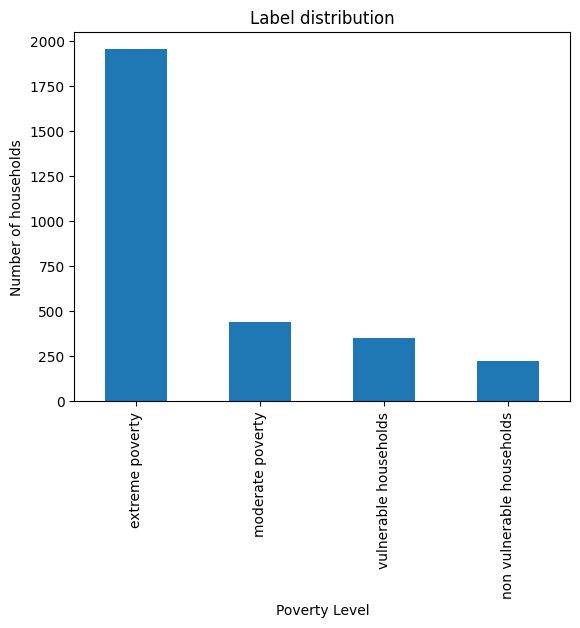

In [4]:
fig, ax = plt.subplots()

# creating the bar plot
labels = [1,2,3,4]
label_codes = {'extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'}
hh_data = data.loc[data['parentesco1'] == 1].reset_index().copy()
hh_label = hh_data['Target'].replace(labels,label_codes)
hh_label.value_counts().plot(ax=ax, kind='bar',title="Label distribution", xlabel='Poverty Level', ylabel='Number of households')

## Data Cleaning

In [5]:
#Check if individuals in same family have same label
unique_values = data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
different_households = unique_values[unique_values != True]
for each_household in different_households.index:
    true_target = int(data[(data['idhogar'] == each_household) & (data['parentesco1'] == 1.0)]['Target'])
    data.loc[data['idhogar'] == each_household, 'Target'] = true_target
unique_values = data.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
different_households = unique_values[unique_values != True]
len(different_households)

C:\Users\jayar\AppData\Local\Temp\ipykernel_18012\1740407754.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  true_target = int(data[(data['idhogar'] == each_household) & (data['parentesco1'] == 1.0)]['Target'])


0

In [6]:
# Calculate the number of missing values in each column
missing_values = pd.DataFrame(data.isnull().sum()).rename(columns={0: 'Number of missing values'})
missing_values['%'] = (missing_values['Number of missing values'] / len(hh_data)) * 100

# Sort the values by percentage of missing values in descending order and display the top 10 columns
top_missing_columns = missing_values.sort_values('%', ascending=False).head().drop('Target', errors='ignore')
top_missing_columns

,Number of missing values,%
rez_esc,7928,266.666667
v18q1,7342,246.955937
v2a1,6860,230.743357
SQBmeaned,5,0.168180
meaneduc,5,0.168180


In [7]:
# Replace null values in v18q1 to 0
data["v18q1"].fillna(0, inplace=True)
data["v2a1"].fillna(0, inplace=True)
data.drop("rez_esc",axis=1, inplace=True)
data.dropna(inplace=True)

C:\Users\jayar\AppData\Local\Temp\ipykernel_18012\672253245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["v18q1"].fillna(0, inplace=True)
C:\Users\jayar\AppData\Local\Temp\ipykernel_18012\672253245.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [8]:
#Get household level data
hh_data = data.loc[data['parentesco1'] == 1].reset_index().copy()
hh_data = hh_data.drop(axis=1,columns=['Id','v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'escolari', 'age'])

In [9]:
#Fix records in dependency,edjefa and edjefe columns by replacing 'yes' with 1 and 'no' with 0
mapping = {"yes": 1, "no": 0}
hh_data['dependency'] = hh_data['dependency'].replace(mapping).astype(np.float64)
hh_data['edjefa'] = hh_data['edjefa'].replace(mapping).astype(np.float64)
hh_data['edjefe'] = hh_data['edjefe'].replace(mapping).astype(np.float64)

In [10]:
#Creating ordinal variables
hh_data['wall_material'] = np.argmax(np.array(hh_data[['paredblolad',	'paredzocalo','paredpreb','pareddes','paredmad', 'paredzinc', 'paredfibras', 'paredother']]),
                           axis = 1)

hh_data['floor_material'] = np.argmax(np.array(hh_data[['pisomoscer',	'pisocemento','pisoother','pisonatur','pisonotiene','pisomadera']]),
                           axis = 1)

hh_data['roof_material'] = np.argmax(np.array(hh_data[['techozinc','techoentrepiso','techocane','techootro']]),
                           axis = 1)
hh_data['water'] = np.argmax(np.array(hh_data[['abastaguadentro','abastaguafuera','abastaguano']]),
                           axis = 1)

hh_data['electricity'] = np.argmax(np.array(hh_data[['public','planpri','noelec','coopele']]),
                           axis = 1)
hh_data['toilet'] = np.argmax(np.array(hh_data[['sanitario1','sanitario2','sanitario3','sanitario5','sanitario6']]),
                           axis = 1)
hh_data['energy'] = np.argmax(np.array(hh_data[['energcocinar1','energcocinar2','energcocinar3','energcocinar4']]),
                           axis = 1)
hh_data['rubbish'] = np.argmax(np.array(hh_data[['elimbasu1','elimbasu2','elimbasu3','elimbasu4','elimbasu5','elimbasu6']]),
                           axis = 1)
hh_data['wall_quality'] = np.argmax(np.array(hh_data[['epared1', 'epared2', 'epared3']]),
                           axis = 1)
hh_data['roof_quality'] = np.argmax(np.array(hh_data[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
hh_data['floor_quality'] = np.argmax(np.array(hh_data[['eviv1', 'eviv2', 'eviv3']]),axis=1)
hh_data['home_ownership'] = np.argmax(np.array(hh_data[['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']]),axis=1)

In [11]:
#Get individual level data
ind_data = data[['Id', 'idhogar','v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'escolari', 'age', 'Target']]

## Feature Selection

### Exploring household-level features 

In [12]:
hh_data_viz = hh_data.copy()
hh_data_viz['Target'] = hh_data_viz['Target'].replace([1,2,3,4],{'extreme poverty', 'moderate poverty', 'vulnerable households', 'non vulnerable households'})

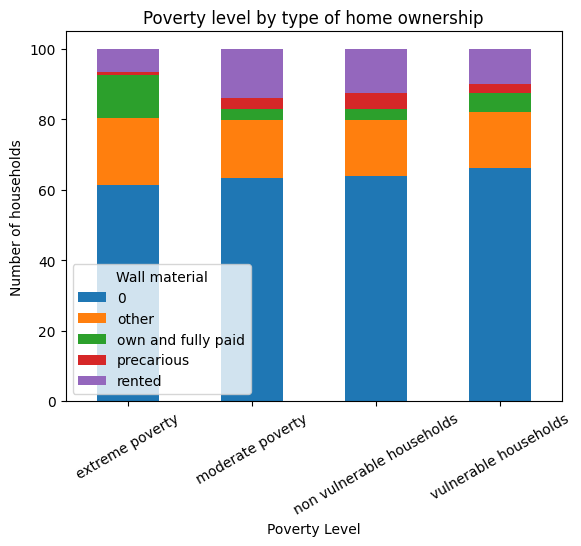

In [13]:
#home ownership
hh_data_viz['home_ownership'] = hh_data_viz['home_ownership'].replace([1,2,3,4,5],
 {'own and fully paid','own, paying in installments','rented','precarious','other'})
grouped1 = hh_data_viz.groupby(['Target','home_ownership'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of home ownership')
plt.legend(title='Wall material')
plt.xticks(rotation=30)
plt.show()

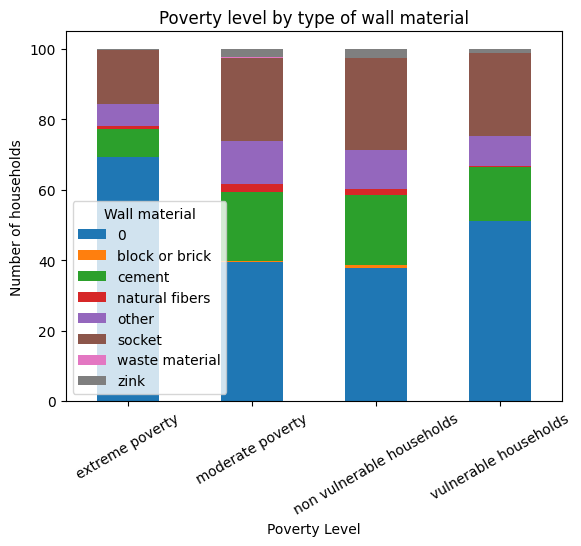

In [14]:
#wall material
hh_data_viz['wall_material'] = hh_data_viz['wall_material'].replace([1,2,3,4,5,6,7,8],
 {'block or brick','socket','cement','waste material','wood','zink','natural fibers','other'})
grouped1 = hh_data_viz.groupby(['Target','wall_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of wall material')
plt.legend(title='Wall material')
plt.xticks(rotation=30)
plt.show()

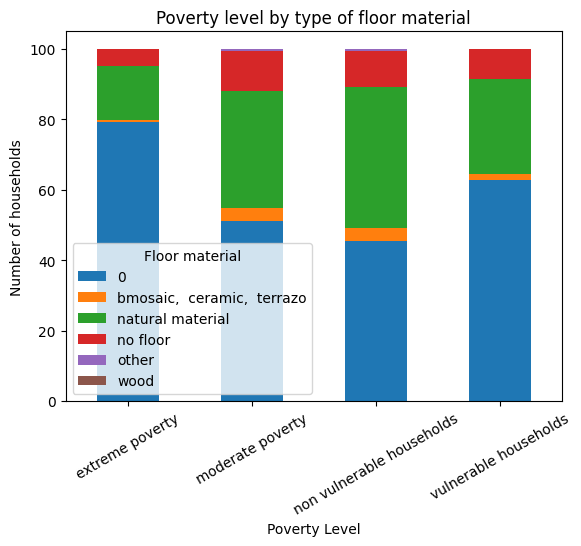

In [15]:
#floor material
hh_data_viz['floor_material'] = hh_data_viz['floor_material'].replace([1,2,3,4,5,6],
 {'bmosaic,  ceramic,  terrazo','cement','other','natural material','no floor','wood'})
grouped1 = hh_data_viz.groupby(['Target','floor_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of floor material')
plt.legend(title='Floor material')
plt.xticks(rotation=30)

plt.show()

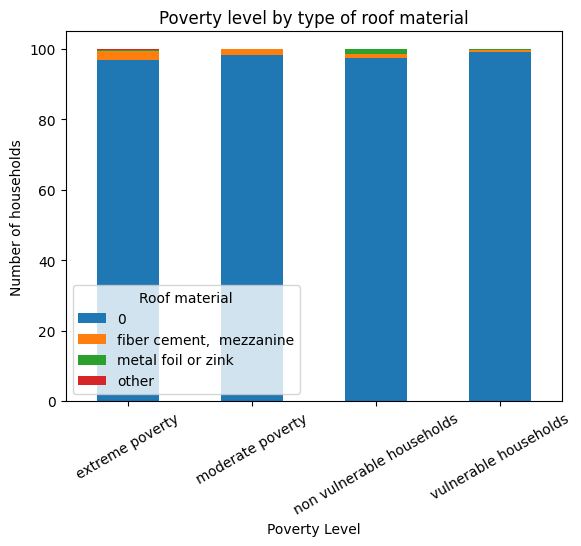

In [16]:
#roof material
hh_data_viz['roof_material'] = hh_data_viz['roof_material'].replace([1,2,3,4],
 {'metal foil or zink','fiber cement,  mezzanine','natural fibre','other'})
grouped1 = hh_data_viz.groupby(['Target','roof_material'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of roof material')
plt.legend(title='Roof material')
plt.xticks(rotation=30)
plt.show()

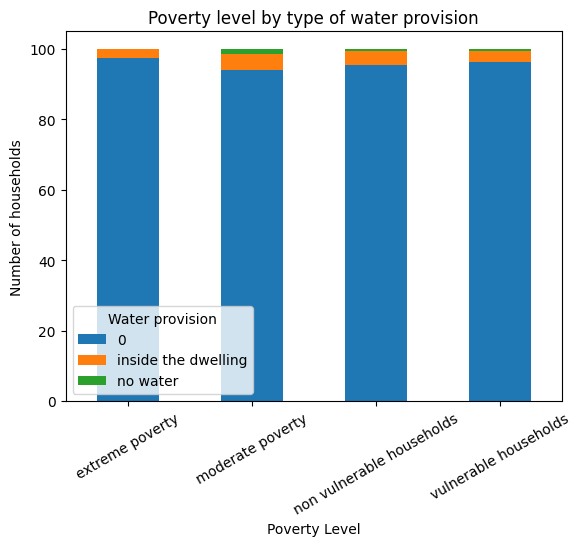

In [17]:
#water
hh_data_viz['water'] = hh_data_viz['water'].replace([1,2,3],
 {'inside the dwelling','outside the dwelling','no water'})
grouped1 = hh_data_viz.groupby(['Target','water'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of water provision')
plt.legend(title='Water provision')
plt.xticks(rotation=30)

plt.show()

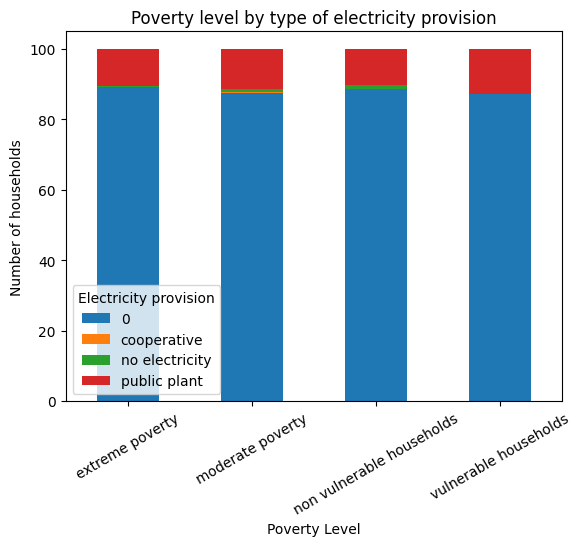

In [18]:
#electricity
hh_data_viz['electricity'] = hh_data_viz['electricity'].replace([1,2,3,4],
 {'public plant','private plant','no electricity','cooperative'})
grouped1 = hh_data_viz.groupby(['Target','electricity'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of electricity provision')
plt.legend(title='Electricity provision')
plt.xticks(rotation=30)

plt.show()

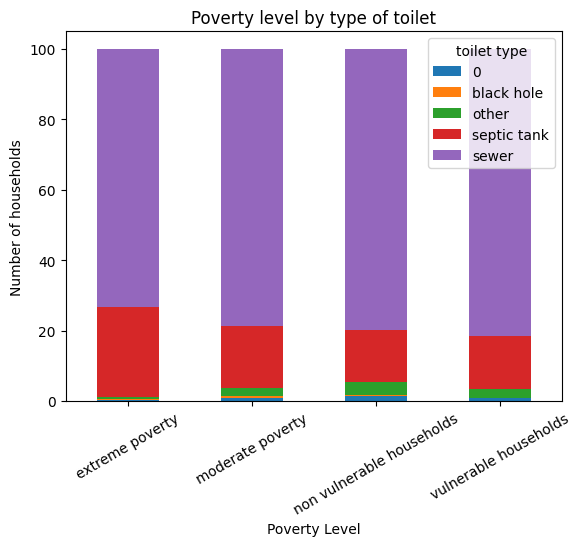

In [19]:
#toilet
hh_data_viz['toilet'] = hh_data_viz['toilet'].replace([1,2,3,4,5],
 {'pno toilet','sewer','septic tank','black hole','other'})
grouped1 = hh_data_viz.groupby(['Target','toilet'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of toilet')
plt.legend(title='toilet type')
plt.xticks(rotation=30)

plt.show()

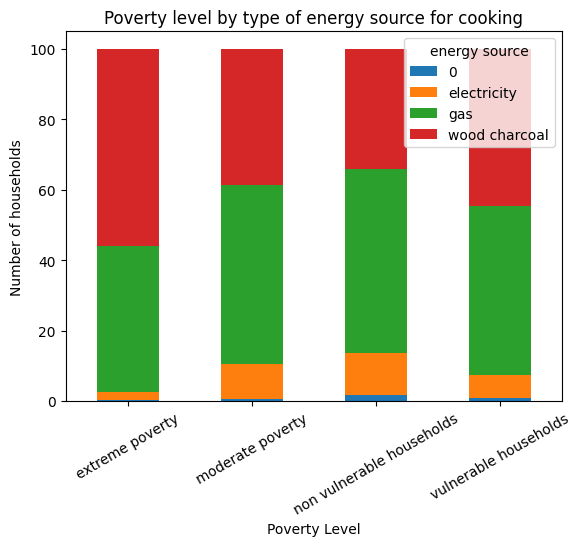

In [20]:
#energy
hh_data_viz['energy'] = hh_data_viz['energy'].replace([1,2,3,4],
 {'No source','electricity','gas','wood charcoal'})
grouped1 = hh_data_viz.groupby(['Target','energy'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by type of energy source for cooking')
plt.legend(title='energy source')
plt.xticks(rotation=30)

plt.show()

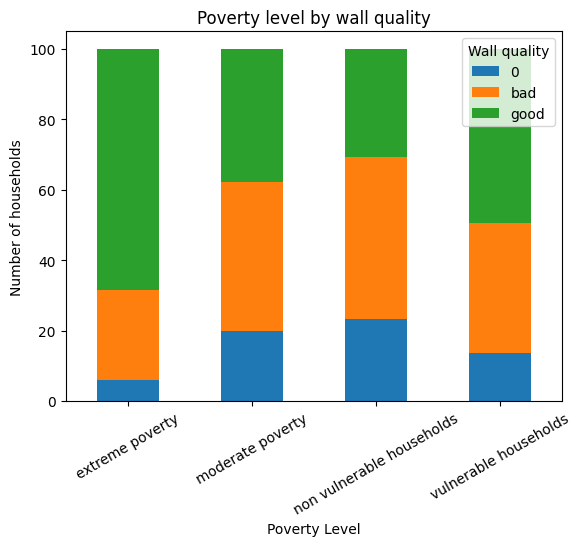

In [21]:
#wall quality
hh_data_viz['wall_quality'] = hh_data_viz['wall_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = hh_data_viz.groupby(['Target','wall_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by wall quality')
plt.legend(title='Wall quality')
plt.xticks(rotation=30)

plt.show()

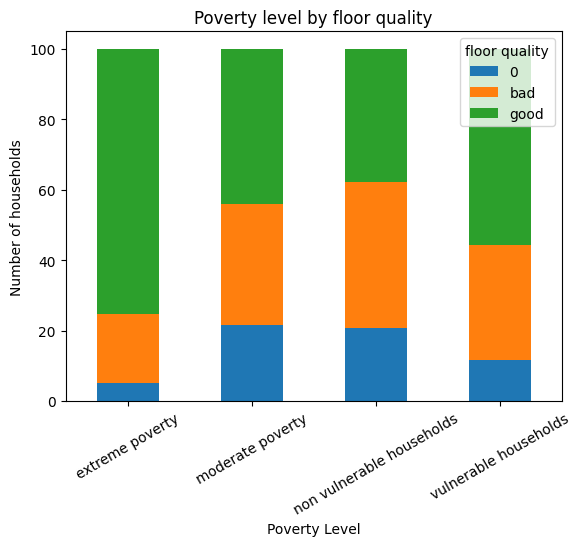

In [22]:
#floor quality
hh_data_viz['floor_quality'] = hh_data_viz['floor_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = hh_data_viz.groupby(['Target','floor_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by floor quality')
plt.legend(title='floor quality')
plt.xticks(rotation=30)

plt.show()

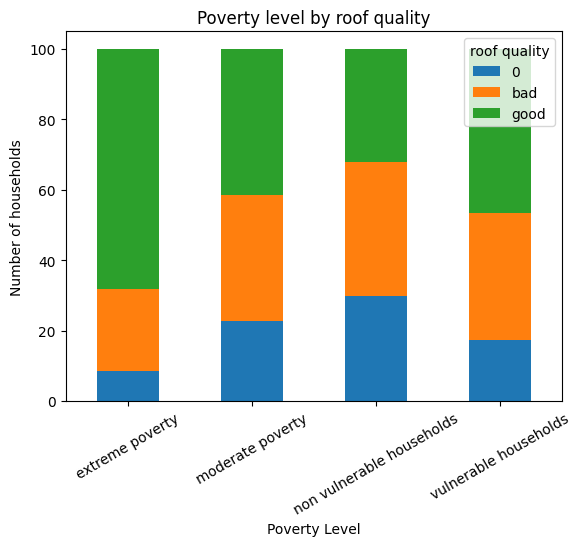

In [23]:
#roof quality
hh_data_viz['roof_quality'] = hh_data_viz['roof_quality'].replace([1,2,3],
 {'bad','regular','good'})
grouped1 = hh_data_viz.groupby(['Target','roof_quality'])['idhogar'].nunique().unstack()
grouped_percentage = grouped1.div(grouped1.sum(axis=1), axis=0) * 100
grouped_percentage.plot(kind='bar', stacked=True)
plt.xlabel('Poverty Level')
plt.ylabel('Number of households')
plt.title('Poverty level by roof quality')
plt.legend(title='roof quality')
plt.xticks(rotation=30)

plt.show()

### Feature Engineering

In [24]:
#Creating new features
hh_data['walls+roof+floor_quality'] = hh_data['wall_quality'] + hh_data['roof_quality'] + hh_data['floor_quality']
hh_data['no_basic_facilities'] = 1 * (hh_data['sanitario1'] + 
                         (hh_data['electricity'] == 0) + 
                         hh_data['pisonotiene'] + 
                         hh_data['abastaguano'] + 
                         (hh_data['cielorazo'] == 0))
hh_data['extra_facilities'] = 1 * (hh_data['refrig'] + 
                      hh_data['computer'] + 
                      (hh_data['v18q1'] > 0) + 
                      hh_data['television']+(hh_data['qmobilephone']>0))
hh_data['rooms_pc'] = hh_data['rooms'] / hh_data['tamviv']

In [25]:
#Remove columns with high correlation with other columns
corr_matrix = hh_data.drop(columns=['Target']).set_index('idhogar').corr().abs()

columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] >= 0.95:
            col_name = corr_matrix.columns[j]
            columns_to_drop.add(col_name)

hh_data = hh_data.drop(columns=columns_to_drop)
len(hh_data.columns)


114

In [26]:
#Aggregate individual-level features to add to the household level data
ind_agg = ind_data.drop(axis = 1, labels = ['Target','Id']).groupby('idhogar').agg(['min', 'max', 'sum','mean'])
ind_agg.columns = [f"{i}-{j}" for i in ind_agg.columns.levels[0] for j in ind_agg.columns.levels[1]]
ind_agg.head()

,v18q-min,v18q-max,v18q-sum,v18q-mean,dis-min,dis-max,dis-sum,dis-mean,male-min,male-max,...,mobilephone-sum,mobilephone-mean,escolari-min,escolari-max,escolari-sum,escolari-mean,age-min,age-max,age-sum,age-mean
idhogar,,,,,,,,,,,,,,,,,,,,,
001ff74ca,1,1,2,1.0,0,0,0,0.0,0,0,...,2,1.0,0,16,16,8.000000,0,38,38,19.000000
003123ec2,0,0,0,0.0,0,0,0,0.0,0,1,...,4,1.0,0,7,13,3.250000,1,24,51,12.750000
004616164,0,0,0,0.0,0,0,0,0.0,1,1,...,2,1.0,3,11,14,7.000000,16,50,66,33.000000
004983866,0,0,0,0.0,0,0,0,0.0,0,1,...,2,1.0,7,8,15,7.500000,16,59,75,37.500000
005905417,0,0,0,0.0,0,0,0,0.0,0,1,...,3,1.0,0,9,17,5.666667,6,32,52,17.333333


In [27]:
#Remove columns with high correlation with other columns
corr_matrix = ind_agg.corr().abs()

columns_to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] >= 0.95:
            col_name = corr_matrix.columns[j]
            columns_to_drop.add(col_name)

ind_agg = ind_agg.drop(columns=columns_to_drop)
len(ind_agg.columns)

119

In [28]:
#Combine selected household level and individual level features
features = pd.merge(hh_data, ind_agg, on="idhogar").set_index('idhogar')
#Find correlation of features with target variable and keep only those with high correlation
correlation_with_target = features.corrwith(features['Target']).drop('Target')
correlation_with_target=correlation_with_target.dropna()
selected_features=correlation_with_target[(correlation_with_target > 0.2) | (correlation_with_target < -0.2)].index.tolist()
selected_features.append('Target')

c:\Users\jayar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\jayar\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [29]:
final_data = features[selected_features]

## Model Selection

In [30]:
X = final_data.iloc[:,:-1]
y = final_data.iloc[:,-1]
X.head()

,rooms,r4m1,r4t1,paredblolad,pisomoscer,pisocemento,cielorazo,epared1,epared3,etecho1,...,instlevel2-max,instlevel2-sum,instlevel2-mean,instlevel8-max,instlevel8-sum,instlevel8-mean,escolari-min,escolari-max,escolari-sum,escolari-mean
idhogar,,,,,,,,,,,,,,,,,,,,,
21eb7fcc1,3,0,0,1,1,0,1,0,0,1,...,0,0,0.00,0,0,0.0,10,10,10,10.00
0e5d7a658,4,0,0,0,0,0,1,0,0,0,...,0,0,0.00,1,1,1.0,12,12,12,12.00
2c7317ea8,8,0,0,0,1,0,1,0,0,0,...,0,0,0.00,0,0,0.0,11,11,11,11.00
2b58d945f,5,1,1,1,1,0,1,0,1,0,...,1,1,0.25,0,0,0.0,2,11,33,8.25
d6dae86b7,2,2,2,1,1,0,1,1,0,1,...,1,1,0.25,0,0,0.0,0,11,23,5.75


In [31]:
#Divide data in training and testing sets
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1001)

In [32]:
# Import model libraries
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate 


### Multilayer Perceptron

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
mlp = MLPClassifier(max_iter=1000, random_state=42)

In [35]:
mlp.fit(X_train, y_train)
 
# Make predictions on the test data
y_pred = mlp.predict(X_test)
 
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred,average = 'macro')

print(f"Accuracy: {f1:.2f}")

Accuracy: 0.32


In [36]:
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,40,60)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y) # X is train samples and y is the corresponding labels
clf.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (20, 40, 60),
 'learning_rate': 'adaptive',
 'solver': 'sgd'}

In [37]:
clf.best_score_

0.6760942760942761

### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)
y_pred = logisticRegr.predict(X_test)
accuracy_score(y_test, y_pred)*100

68.01346801346801

c:\Users\jayar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\jayar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

8.0


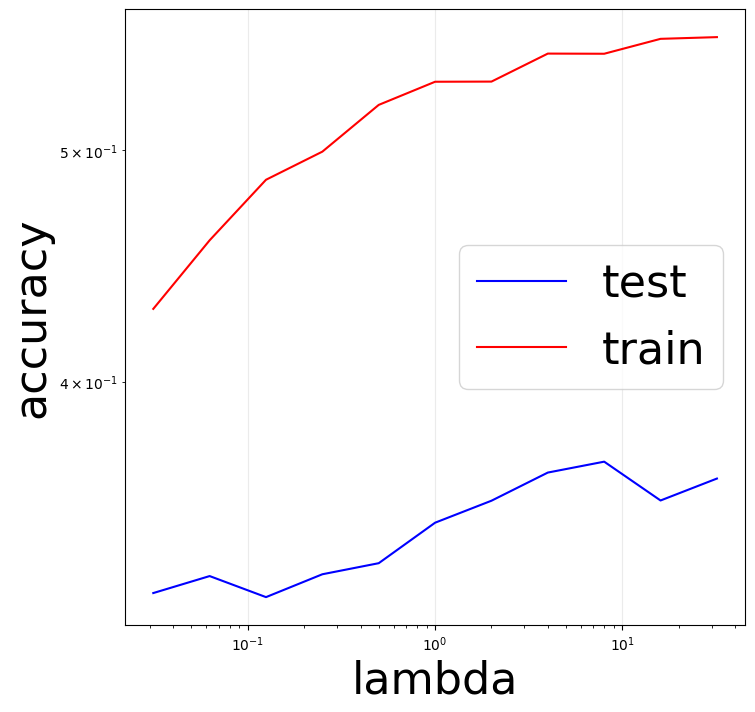

In [39]:
lambdas = np.logspace(5, -5, 11, base=2)
best_score, best_lambda = 0, None
mean_train_scores, mean_test_scores = [], []

# TODO
for l in lambdas:
    logreg = LogisticRegression(C=l)
    scores = cross_validate(logreg, X_test, y_test,scoring=['accuracy', 'f1_macro'], return_train_score=True)  # TODO
    mean_train_scores.append(np.mean(scores['train_f1_macro']))# TODO 
    mean_test_scores.append(np.mean(scores['test_f1_macro']))  # TODO 

best_score = np.max(mean_test_scores)
best_lambda = lambdas[np.where(mean_test_scores==best_score)][0]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
ax.loglog(lambdas, mean_test_scores, color="blue")
ax.loglog(lambdas, mean_train_scores, color="red")
ax.grid(alpha=0.25)
ax.set_xlabel("lambda", fontsize=32)
ax.set_ylabel("accuracy", fontsize=32)
ax.legend(["test", "train"], fontsize=32)
print(best_lambda)

### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

neighbors = [5, 7, 9, 11, 13, 15, 20]
accuracy_scores = {}
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_scores[n] = accuracy_score(y_test, y_pred)

for n, accuracy in accuracy_scores.items():
    print(f"Number of Neighbors: {n}, Accuracy: {accuracy}")

Number of Neighbors: 5, Accuracy: 0.6380471380471381
Number of Neighbors: 7, Accuracy: 0.6515151515151515
Number of Neighbors: 9, Accuracy: 0.6666666666666666
Number of Neighbors: 11, Accuracy: 0.6632996632996633
Number of Neighbors: 13, Accuracy: 0.6750841750841751
Number of Neighbors: 15, Accuracy: 0.6851851851851852
Number of Neighbors: 20, Accuracy: 0.6936026936026936
